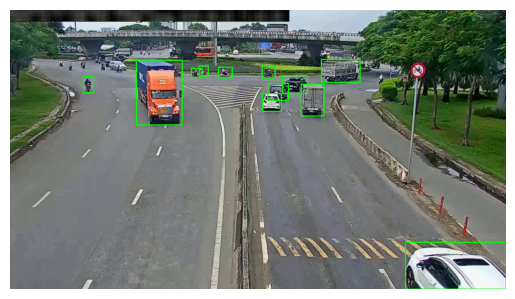

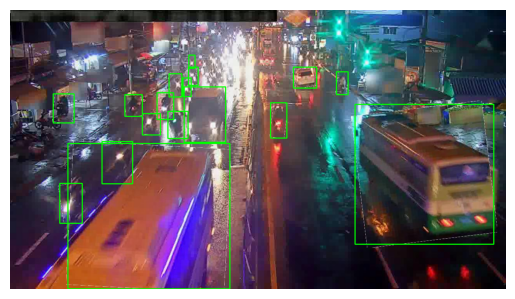

In [13]:
import os
import cv2
import matplotlib.pyplot as plt

def convert_yolo_to_xy(yolo_line, img_width, img_height):
  """
  Converts a YOLO format bounding box to xmin, ymin, xmax, ymax.

  Args:
    yolo_line: A string representing a YOLO format bounding box.
    img_width: The width of the image.
    img_height: The height of the image.

  Returns:
    A tuple containing (xmin, ymin, xmax, ymax).
  """
  class_id, x_center, y_center, width, height = map(float, yolo_line.split())
  xmin = int((x_center - width / 2) * img_width)
  ymin = int((y_center - height / 2) * img_height)
  xmax = int((x_center + width / 2) * img_width)
  ymax = int((y_center + height / 2) * img_height)
  return xmin, ymin, xmax, ymax


def visualize_bboxes(image_path, txt_path):
  """
  Visualizes bounding boxes on an image.

  Args:
    image_path: The path to the image file.
    txt_path: The path to the txt file containing bounding box coordinates in YOLO format.
  """
  img = cv2.imread(image_path)
  img_height, img_width = img.shape[:2]

  with open(txt_path, 'r') as f:
    for line in f:
      xmin, ymin, xmax, ymax = convert_yolo_to_xy(line.strip(), img_width, img_height)
      cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

  # Convert BGR image to RGB
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img_rgb)
  plt.axis('off')
  plt.show()

# Example usage
image_path = "../data/raw/train_20241023/daytime/cam_01_00001.jpg"
txt_path = "../data/raw/train_20241023/daytime/cam_01_00001.txt"

visualize_bboxes(image_path, txt_path)

image_path = "../data/raw/train_20241023/nighttime/cam_08_00201_jpg.rf.d882582ede2c31576183447ec33ffa6c.jpg"
txt_path = "../data/raw/train_20241023/nighttime/cam_08_00201_jpg.rf.d882582ede2c31576183447ec33ffa6c.txt"

visualize_bboxes(image_path, txt_path)


## Daytime

In [4]:
import os
import cv2
import pandas as pd

def convert_yolo_to_xy(yolo_line, img_width, img_height):
  """
  Converts a YOLO format bounding box to xmin, ymin, xmax, ymax.

  Args:
    yolo_line: A string representing a YOLO format bounding box.
    img_width: The width of the image.
    img_height: The height of the image.

  Returns:
    A tuple containing (xmin, ymin, xmax, ymax).
  """
  class_id, x_center, y_center, width, height = map(float, yolo_line.split())
  xmin = int((x_center - width / 2) * img_width)
  ymin = int((y_center - height / 2) * img_height)
  xmax = int((x_center + width / 2) * img_width)
  ymax = int((y_center + height / 2) * img_height)
  return xmin, ymin, xmax, ymax, class_id


def process_directory(directory_path):
  """
  Processes a directory containing image and txt files to create a dataframe.

  Args:
    directory_path: The path to the directory.

  Returns:
    A pandas DataFrame with columns 'xmax', 'ymax', 'xmin', 'ymin'.
  """
  data = []
  for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
      txt_path = os.path.join(directory_path, filename)
      image_path = os.path.join(directory_path, filename.replace(".txt", ".jpg"))

      if os.path.exists(image_path):
        img = cv2.imread(image_path)
        img_height, img_width = img.shape[:2]

        with open(txt_path, 'r') as f:
          for line in f:
            xmin, ymin, xmax, ymax, class_id = convert_yolo_to_xy(line.strip(), img_width, img_height)
            data.append([filename, xmax, ymax, xmin, ymin, class_id])

  df = pd.DataFrame(data, columns=['filename', 'xmax', 'ymax', 'xmin', 'ymin', "class"])
  return df


# Example usage
directory_path = "../data/raw/train_20241023/daytime"
df = process_directory(directory_path)
df

,filename,xmax,ymax,xmin,ymin,class
0,cam_09_00147.txt,204,671,110,556,0.0
1,cam_09_00147.txt,443,570,369,483,0.0
2,cam_09_00147.txt,519,543,468,449,0.0
3,cam_09_00147.txt,561,554,519,464,0.0
4,cam_09_00147.txt,601,529,561,441,0.0
...,...,...,...,...,...,...
99063,cam_06_00903.txt,545,200,500,148,1.0
99064,cam_06_00903.txt,723,240,667,165,3.0
99065,cam_06_00903.txt,776,335,710,247,3.0
99066,cam_06_00903.txt,708,182,660,122,3.0


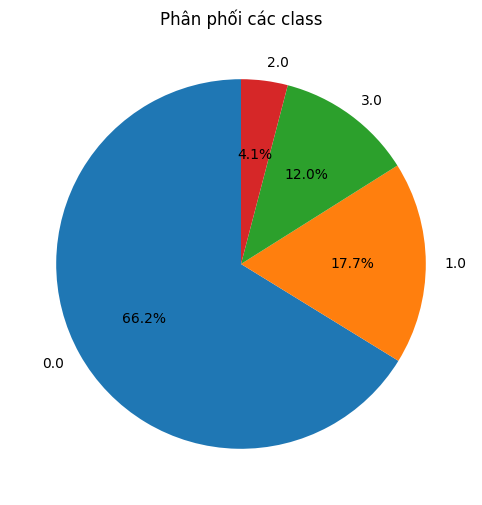

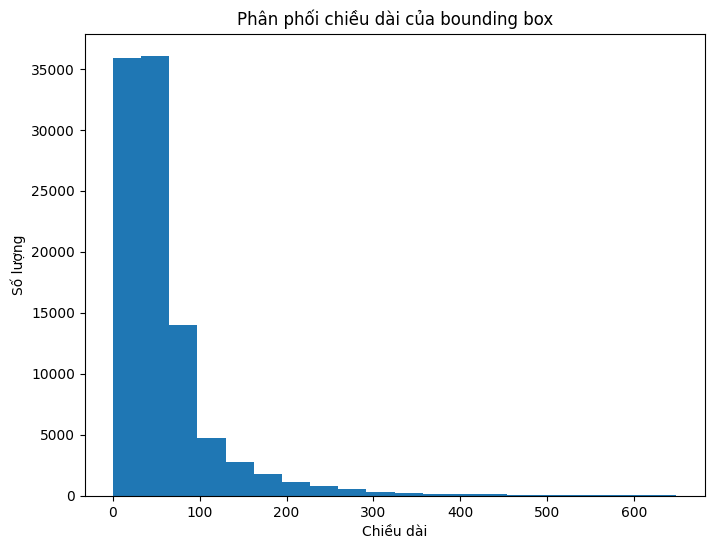

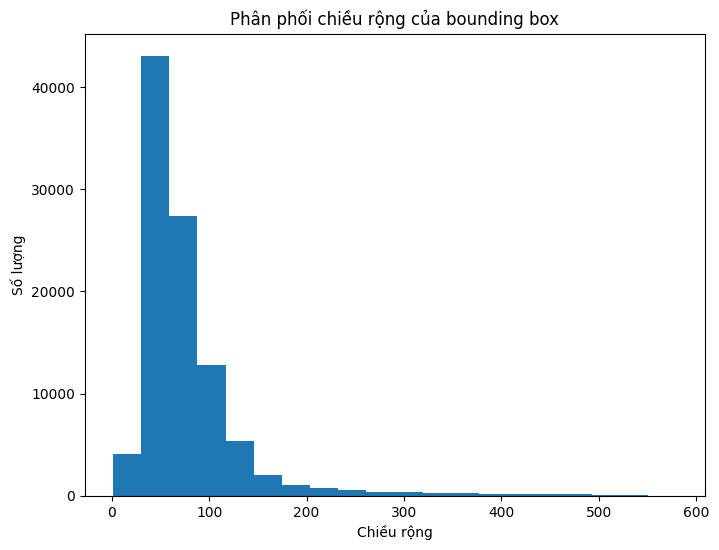

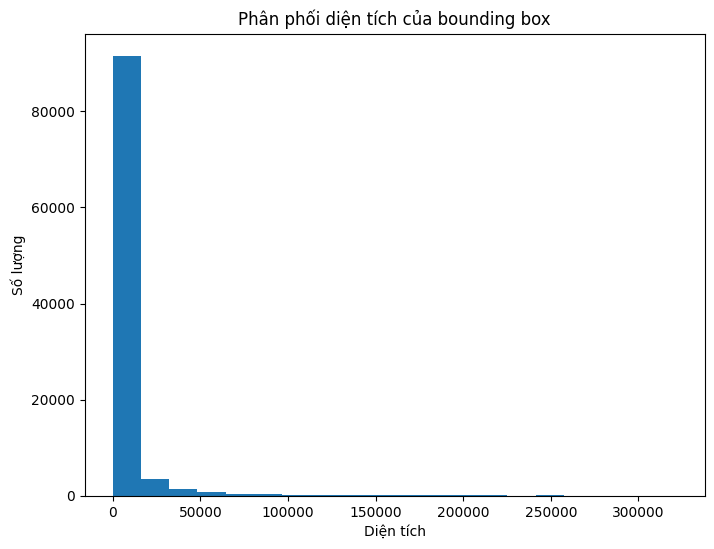

In [6]:
import matplotlib.pyplot as plt

# 1. Biểu đồ tròn phân phối các class
class_counts = df['class'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Phân phối các class')
plt.show()

# 2. Biểu đồ histogram phân phối chiều dài của bounding box
df['width'] = df['xmax'] - df['xmin']
plt.figure(figsize=(8, 6))
plt.hist(df['width'], bins=20)
plt.xlabel('Chiều dài')
plt.ylabel('Số lượng')
plt.title('Phân phối chiều dài của bounding box')
plt.show()

# 3. Biểu đồ histogram phân phối chiều rộng của bounding box
df['height'] = df['ymax'] - df['ymin']
plt.figure(figsize=(8, 6))
plt.hist(df['height'], bins=20)
plt.xlabel('Chiều rộng')
plt.ylabel('Số lượng')
plt.title('Phân phối chiều rộng của bounding box')
plt.show()

# 4. Biểu đồ histogram phân phối diện tích của bounding box
df['area'] = df['width'] * df['height']
plt.figure(figsize=(8, 6))
plt.hist(df['area'], bins=20)
plt.xlabel('Diện tích')
plt.ylabel('Số lượng')
plt.title('Phân phối diện tích của bounding box')
plt.show()

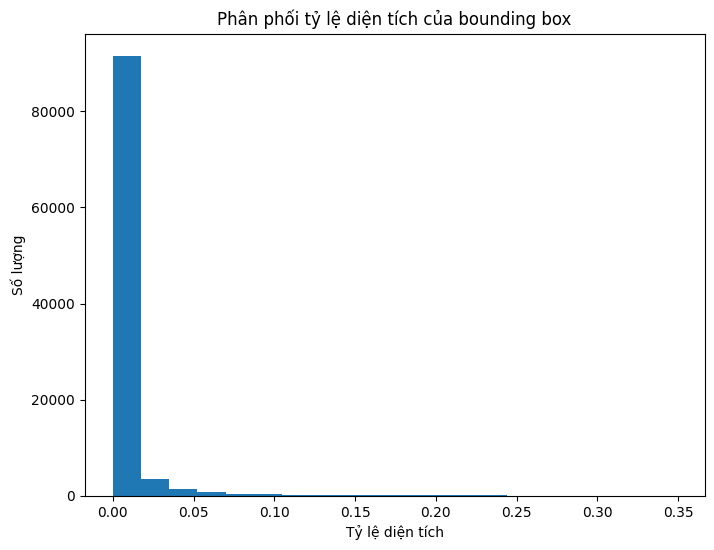

In [7]:
# Tính tỷ lệ diện tích của bounding box so với ảnh
df['img_width'] = 0
df['img_height'] = 0

for filename in df['filename'].unique():
  image_path = os.path.join(directory_path, filename.replace(".txt", ".jpg"))
  if os.path.exists(image_path):
    img = cv2.imread(image_path)
    img_height, img_width = img.shape[:2]
    df.loc[df['filename'] == filename, 'img_width'] = img_width
    df.loc[df['filename'] == filename, 'img_height'] = img_height


df['ratio'] = (df['area'] / (df['img_width'] * df['img_height']))

# Vẽ biểu đồ histogram cho tỷ lệ đó
plt.figure(figsize=(8, 6))
plt.hist(df['ratio'], bins=20)
plt.xlabel('Tỷ lệ diện tích')
plt.ylabel('Số lượng')
plt.title('Phân phối tỷ lệ diện tích của bounding box')
plt.show()

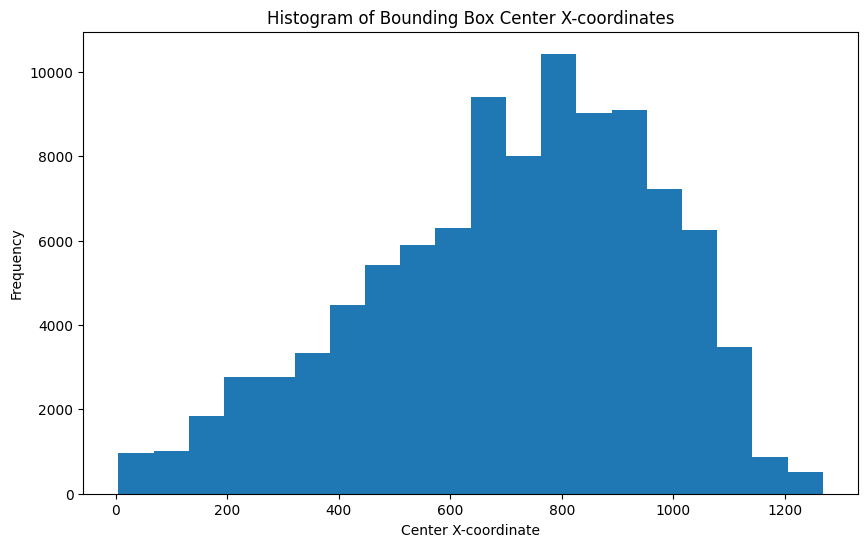

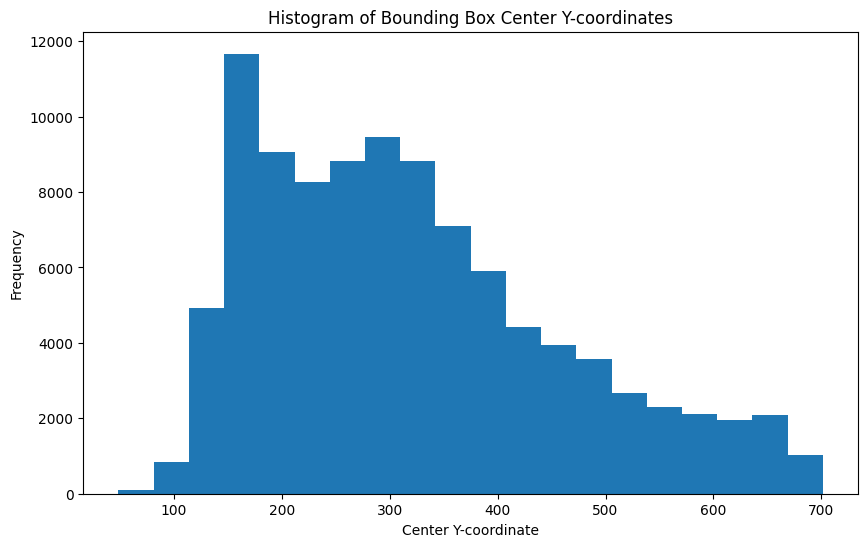

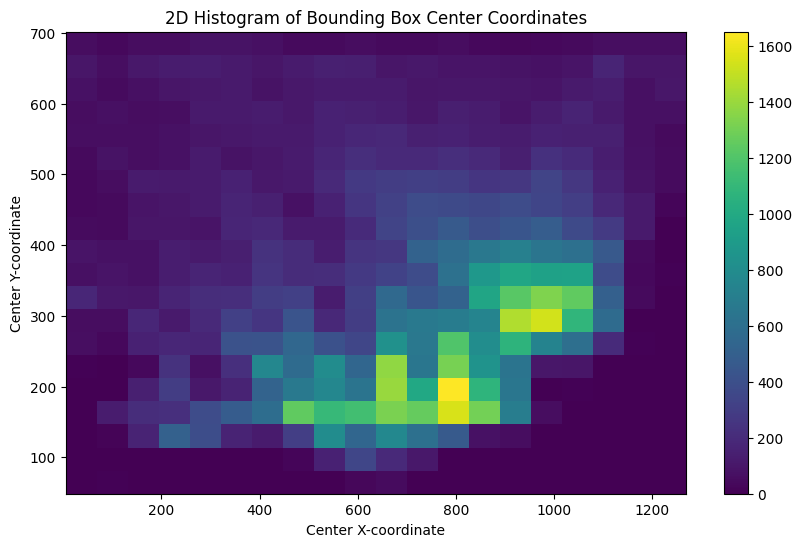

In [8]:

# Calculate the center coordinates of each bounding box
df['center_x'] = (df['xmin'] + df['xmax']) / 2
df['center_y'] = (df['ymin'] + df['ymax']) / 2

# Create a histogram of the center x-coordinates
plt.figure(figsize=(10, 6))
plt.hist(df['center_x'], bins=20)
plt.xlabel('Center X-coordinate')
plt.ylabel('Frequency')
plt.title('Histogram of Bounding Box Center X-coordinates')
plt.show()

# Create a histogram of the center y-coordinates
plt.figure(figsize=(10, 6))
plt.hist(df['center_y'], bins=20)
plt.xlabel('Center Y-coordinate')
plt.ylabel('Frequency')
plt.title('Histogram of Bounding Box Center Y-coordinates')
plt.show()

# Create a 2D histogram of the center coordinates
plt.figure(figsize=(10, 6))
plt.hist2d(df['center_x'], df['center_y'], bins=(20, 20), cmap='viridis')
plt.xlabel('Center X-coordinate')
plt.ylabel('Center Y-coordinate')
plt.title('2D Histogram of Bounding Box Center Coordinates')
plt.colorbar()
plt.show()

## Nightime

In [9]:
import os
import cv2
import pandas as pd

def convert_yolo_to_xy(yolo_line, img_width, img_height):
  """
  Converts a YOLO format bounding box to xmin, ymin, xmax, ymax.

  Args:
    yolo_line: A string representing a YOLO format bounding box.
    img_width: The width of the image.
    img_height: The height of the image.

  Returns:
    A tuple containing (xmin, ymin, xmax, ymax).
  """
  class_id, x_center, y_center, width, height = map(float, yolo_line.split())
  xmin = int((x_center - width / 2) * img_width)
  ymin = int((y_center - height / 2) * img_height)
  xmax = int((x_center + width / 2) * img_width)
  ymax = int((y_center + height / 2) * img_height)
  return xmin, ymin, xmax, ymax, class_id


def process_directory(directory_path):
  """
  Processes a directory containing image and txt files to create a dataframe.

  Args:
    directory_path: The path to the directory.

  Returns:
    A pandas DataFrame with columns 'xmax', 'ymax', 'xmin', 'ymin'.
  """
  data = []
  for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
      txt_path = os.path.join(directory_path, filename)
      image_path = os.path.join(directory_path, filename.replace(".txt", ".jpg"))

      if os.path.exists(image_path):
        img = cv2.imread(image_path)
        img_height, img_width = img.shape[:2]

        with open(txt_path, 'r') as f:
          for line in f:
            xmin, ymin, xmax, ymax, class_id = convert_yolo_to_xy(line.strip(), img_width, img_height)
            data.append([filename, xmax, ymax, xmin, ymin, class_id])

  df = pd.DataFrame(data, columns=['filename', 'xmax', 'ymax', 'xmin', 'ymin', "class"])
  return df


# Example usage
directory_path = "../data/raw/train_20241023/nighttime"
df = process_directory(directory_path)
df

,filename,xmax,ymax,xmin,ymin,class
0,cam_05_01068_jpg.rf.8221486cc7eb390d67d2709bdc...,670,252,640,207,4.0
1,cam_05_01068_jpg.rf.8221486cc7eb390d67d2709bdc...,594,259,518,169,7.0
2,cam_08_00284_jpg.rf.41c61bb5585410409a202c0565...,836,392,700,257,5.0
3,cam_08_00284_jpg.rf.41c61bb5585410409a202c0565...,835,205,808,152,4.0
4,cam_08_00284_jpg.rf.41c61bb5585410409a202c0565...,1163,484,1098,393,4.0
...,...,...,...,...,...,...
29691,cam_08_00279_jpg.rf.327c3312946ca4a72e2b8525d3...,662,203,621,166,4.0
29692,cam_08_00279_jpg.rf.327c3312946ca4a72e2b8525d3...,484,210,459,160,4.0
29693,cam_08_00279_jpg.rf.327c3312946ca4a72e2b8525d3...,512,181,478,131,4.0
29694,cam_08_00279_jpg.rf.327c3312946ca4a72e2b8525d3...,536,191,511,148,4.0


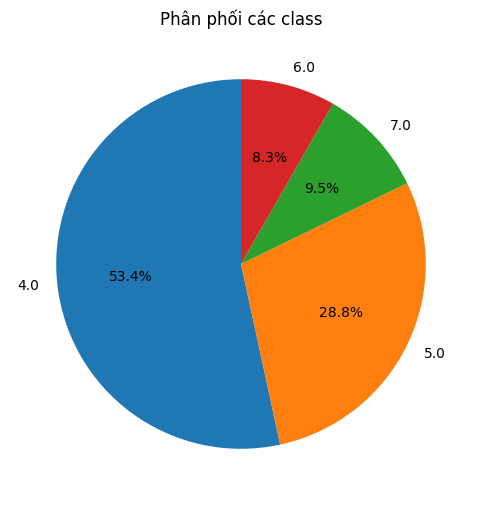

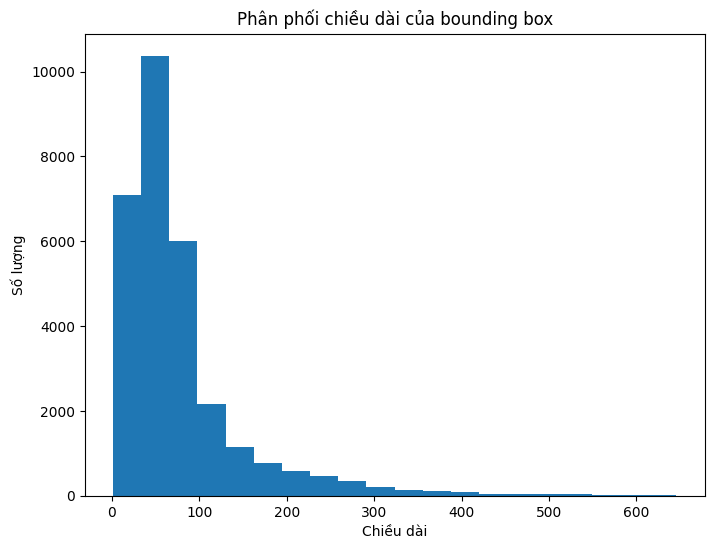

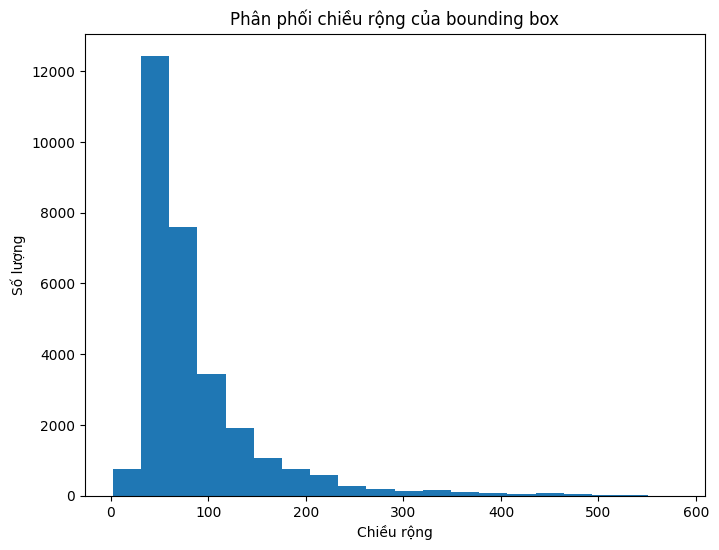

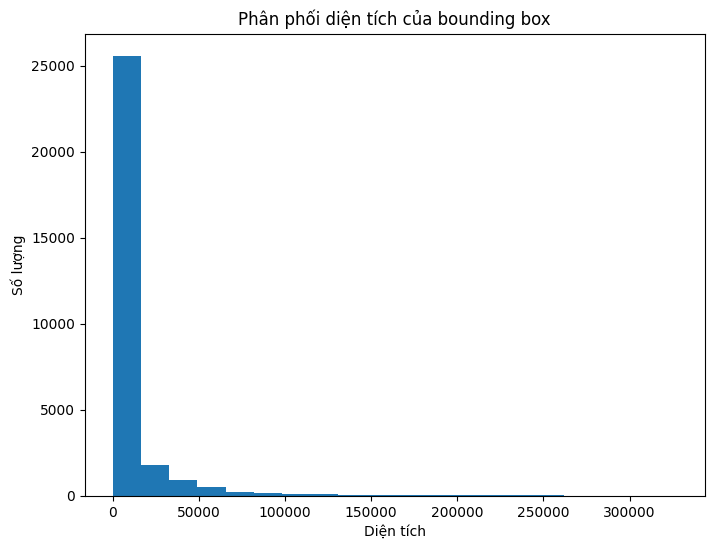

In [10]:
import matplotlib.pyplot as plt

# 1. Biểu đồ tròn phân phối các class
class_counts = df['class'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Phân phối các class')
plt.show()

# 2. Biểu đồ histogram phân phối chiều dài của bounding box
df['width'] = df['xmax'] - df['xmin']
plt.figure(figsize=(8, 6))
plt.hist(df['width'], bins=20)
plt.xlabel('Chiều dài')
plt.ylabel('Số lượng')
plt.title('Phân phối chiều dài của bounding box')
plt.show()

# 3. Biểu đồ histogram phân phối chiều rộng của bounding box
df['height'] = df['ymax'] - df['ymin']
plt.figure(figsize=(8, 6))
plt.hist(df['height'], bins=20)
plt.xlabel('Chiều rộng')
plt.ylabel('Số lượng')
plt.title('Phân phối chiều rộng của bounding box')
plt.show()

# 4. Biểu đồ histogram phân phối diện tích của bounding box
df['area'] = df['width'] * df['height']
plt.figure(figsize=(8, 6))
plt.hist(df['area'], bins=20)
plt.xlabel('Diện tích')
plt.ylabel('Số lượng')
plt.title('Phân phối diện tích của bounding box')
plt.show()

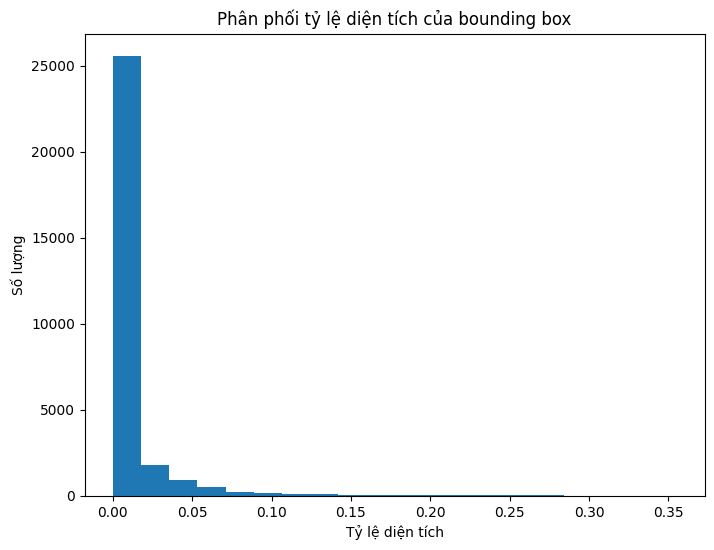

In [11]:
# Tính tỷ lệ diện tích của bounding box so với ảnh
df['img_width'] = 0
df['img_height'] = 0

for filename in df['filename'].unique():
  image_path = os.path.join(directory_path, filename.replace(".txt", ".jpg"))
  if os.path.exists(image_path):
    img = cv2.imread(image_path)
    img_height, img_width = img.shape[:2]
    df.loc[df['filename'] == filename, 'img_width'] = img_width
    df.loc[df['filename'] == filename, 'img_height'] = img_height


df['ratio'] = (df['area'] / (df['img_width'] * df['img_height']))

# Vẽ biểu đồ histogram cho tỷ lệ đó
plt.figure(figsize=(8, 6))
plt.hist(df['ratio'], bins=20)
plt.xlabel('Tỷ lệ diện tích')
plt.ylabel('Số lượng')
plt.title('Phân phối tỷ lệ diện tích của bounding box')
plt.show()

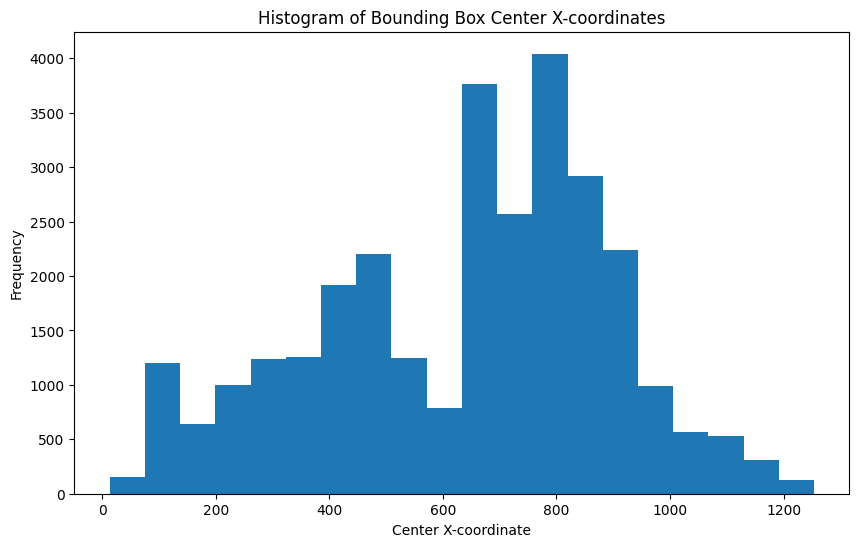

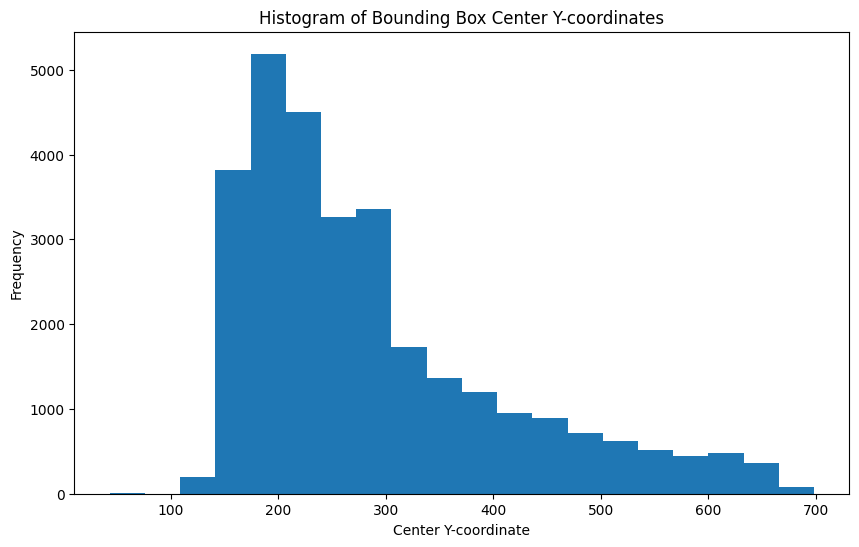

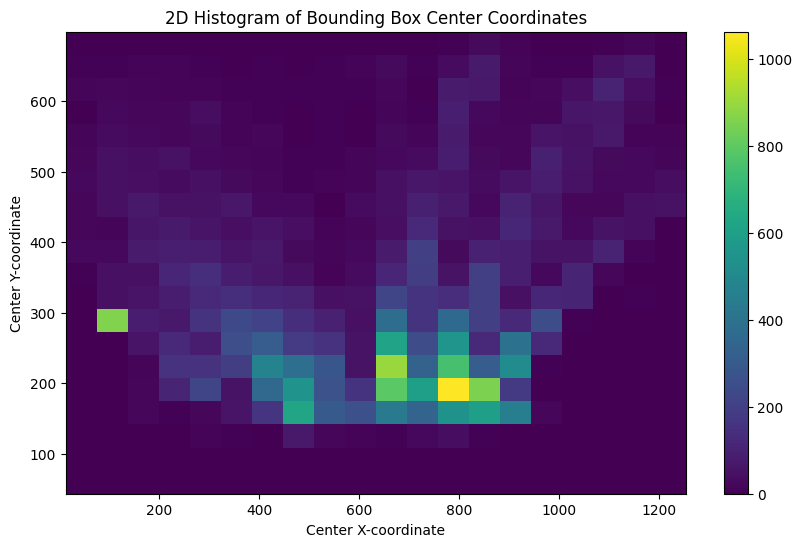

In [12]:

# Calculate the center coordinates of each bounding box
df['center_x'] = (df['xmin'] + df['xmax']) / 2
df['center_y'] = (df['ymin'] + df['ymax']) / 2

# Create a histogram of the center x-coordinates
plt.figure(figsize=(10, 6))
plt.hist(df['center_x'], bins=20)
plt.xlabel('Center X-coordinate')
plt.ylabel('Frequency')
plt.title('Histogram of Bounding Box Center X-coordinates')
plt.show()

# Create a histogram of the center y-coordinates
plt.figure(figsize=(10, 6))
plt.hist(df['center_y'], bins=20)
plt.xlabel('Center Y-coordinate')
plt.ylabel('Frequency')
plt.title('Histogram of Bounding Box Center Y-coordinates')
plt.show()

# Create a 2D histogram of the center coordinates
plt.figure(figsize=(10, 6))
plt.hist2d(df['center_x'], df['center_y'], bins=(20, 20), cmap='viridis')
plt.xlabel('Center X-coordinate')
plt.ylabel('Center Y-coordinate')
plt.title('2D Histogram of Bounding Box Center Coordinates')
plt.colorbar()
plt.show()